# Bay Area Decision Sciences Summit
This notebook serves to simply explore the given data and is distinct from our scripts that will define our alphas for options trading optimization. 

## Libraries & Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [4]:
optimized_trades_df = pd.read_csv("../data/BADSS training data.csv")
optimized_trades_df.head()

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
0,4/11/2024,SPY,4/12/2024,518.0,1.74,13,1.76,592,518.0
1,4/11/2024,SPY,4/12/2024,519.0,1.24,54,1.25,1619,518.0
2,4/11/2024,SPY,4/12/2024,520.0,0.84,94,0.85,2646,518.0
3,4/11/2024,SPY,4/12/2024,521.0,0.54,479,0.55,3311,518.0
4,4/11/2024,SPY,4/12/2024,522.0,0.33,1207,0.34,3614,518.0


In [5]:
optimized_trades_df.describe()

,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
count,25438.000000,25438.000000,25438.000000,25438.000000,25438.000000,25438.000000
mean,432.675752,0.601874,1558.134562,0.646155,4413.116754,404.632690
std,114.801944,1.204770,2108.440647,1.243463,5186.069358,110.127146
min,193.000000,0.000000,0.000000,0.010000,3.000000,192.840000
25%,433.000000,0.000000,0.000000,0.010000,1147.000000,418.820000
50%,469.000000,0.020000,692.500000,0.050000,2856.000000,431.100000
75%,512.000000,0.550000,2320.750000,0.610000,6066.500000,499.720000
max,615.000000,9.070000,18282.000000,9.990000,70576.000000,520.840000


## Time-Series Analysis

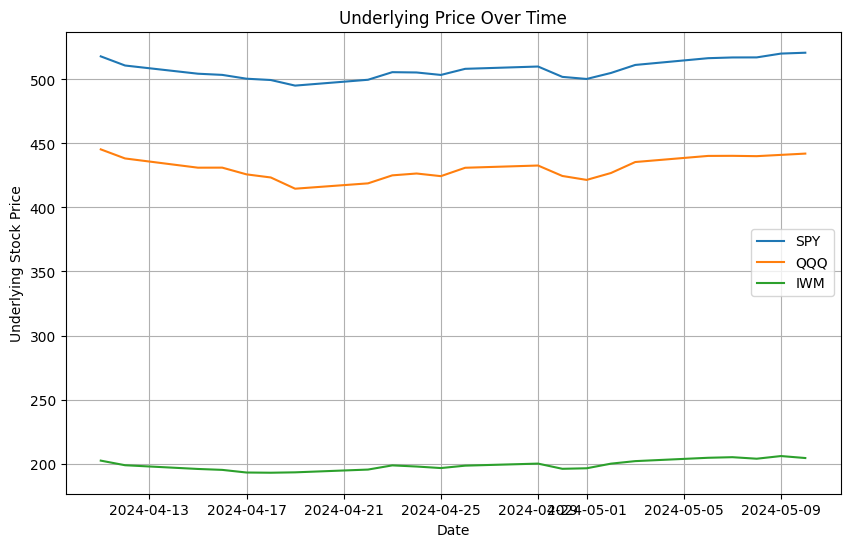

In [6]:
optimized_trades_df['Date'] = pd.to_datetime(optimized_trades_df['Date'])
optimized_trades_df['Maturity'] = pd.to_datetime(optimized_trades_df['Maturity'])
optimized_trades_df = optimized_trades_df.sort_values(by='Date')

# Plot undl price over time
plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.plot(subset['Date'], subset['Undl Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Underlying Price Over Time')
plt.xlabel('Date')
plt.ylabel('Underlying Stock Price')
plt.show()

- SPY (blue) and QQQ (orange) show similar trends, with an initial decline followed by a recovery.
- IWM (green) has a lower absolute price and less volatility compared to SPY and QQQ.
- QQQ experienced a sharper mid-period dip, suggesting higher sensitivity to market conditions.
- SPY remained the most stable, reinforcing its role as a benchmark index.
- General upward trend towards the end across all indices, indicating market recovery.

/tmp/ipykernel_17626/1268451886.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
/tmp/ipykernel_17626/1268451886.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
/tmp/ipykernel_17626/1268451886.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sub

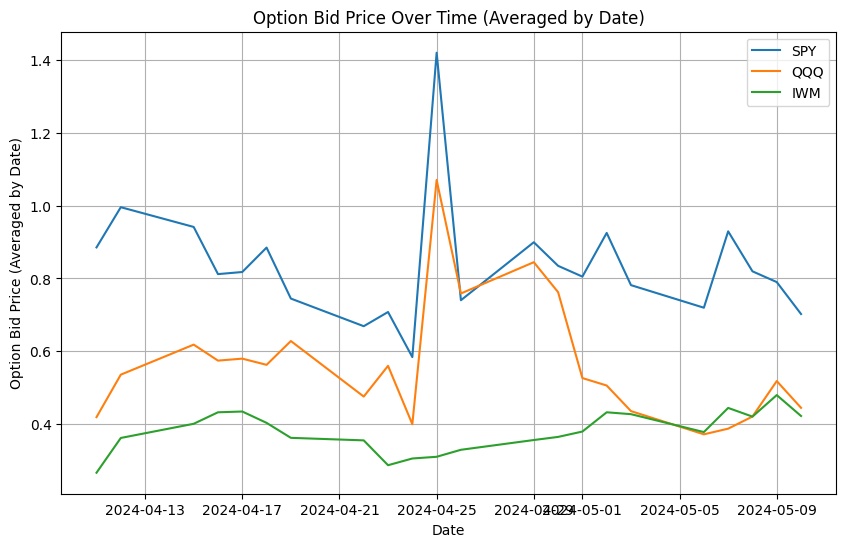

In [7]:
# Plot Option Bid Price Over Time
plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    # average bid price for each date
    subset = subset.groupby('Date').agg({'Bid Price': np.mean}).reset_index()
    plt.plot(subset['Date'], subset['Bid Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Option Bid Price Over Time (Averaged by Date)')
plt.xlabel('Date')
plt.ylabel('Option Bid Price (Averaged by Date)')
plt.show()

- SPY (blue) has the highest average bid prices, followed by QQQ (orange) and IWM (green), suggesting more demand/liquidity for SPY options.
- Sharp spike on April 25 across all three symbols indicates a possible market event or volatility surge.
- QQQ's bid prices decline significantly after April 30, implying reduced demand or lower volatility.
- IWM's bid prices are the most stable, with a slight upward trend toward the end.
- SPY and QQQ exhibit more fluctuations, possibly due to higher market sensitivity.

/tmp/ipykernel_17626/722838951.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
/tmp/ipykernel_17626/722838951.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
/tmp/ipykernel_17626/722838951.py:6: FutureWarning: The provided callable <function mean at 0x7f15153a5800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset

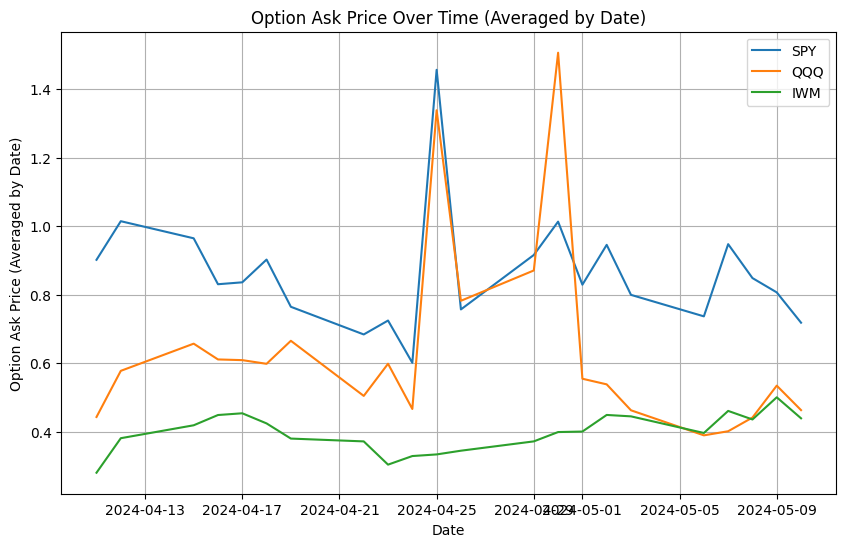

In [8]:
# we do the same for the ask price
plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    # average ask price for each date
    subset = subset.groupby('Date').agg({'Ask Price': np.mean}).reset_index()
    plt.plot(subset['Date'], subset['Ask Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Option Ask Price Over Time (Averaged by Date)')
plt.xlabel('Date')
plt.ylabel('Option Ask Price (Averaged by Date)')
plt.show()

- Ask prices closely follow bid prices, confirming market consistency.
- Sharp spikes on April 25 (SPY, QQQ) and April 30 (QQQ only) suggest market volatility or liquidity shifts.
- QQQ’s ask price surge on April 30 is much more pronounced than its bid price spike, possibly due to wider spreads or lower liquidity.
- SPY and IWM are more stable, with SPY consistently having the highest ask prices.
- IWM shows a gradual increase in ask prices, suggesting growing demand or higher risk pricing.

## Distribution and Density Plots

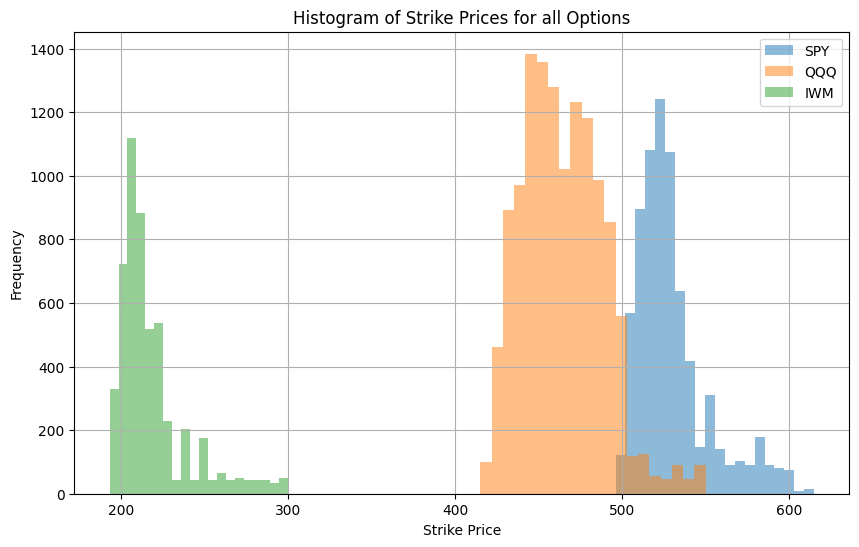

In [9]:
# Plot histogram of Strike Prices for all options
plt.figure(figsize=(10, 6))

for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.hist(subset['Strike'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Strike Prices for all Options')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')
plt.show()

- Distinct clustering for each symbol:
    - SPY (blue) strike prices are centered around 500-550.
    - QQQ (orange) strike prices are mostly between 400-470.
    - IWM (green) strike prices are much lower, primarily 180-220.

- Most strike prices are concentrated near-the-money (close to the underlying price range seen in the earlier time-series plot).

- SPY and QQQ have a wider distribution of strikes, suggesting more diverse option trading strategies.
- IWM has a more condensed range, indicating fewer strike price variations, possibly due to lower volatility or liquidity.

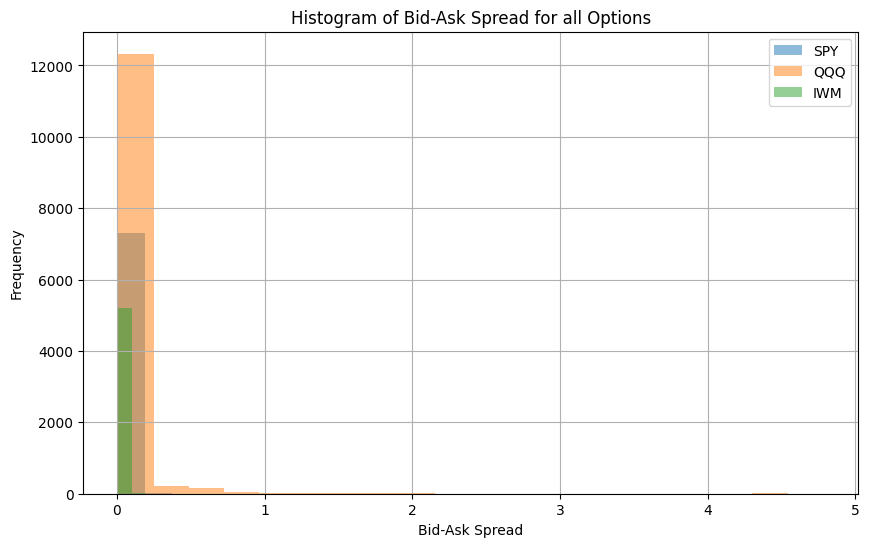

In [10]:
# let's look at bid-ask spread with histogram
optimized_trades_df['Spread'] = optimized_trades_df['Ask Price'] - optimized_trades_df['Bid Price']

plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.hist(subset['Spread'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Bid-Ask Spread for all Options')
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Frequency')
plt.show()

- Most bid-ask spreads are very small (~0 to 0.2), indicating high liquidity in the majority of option contracts.
- QQQ (orange) has the highest frequency of low bid-ask spreads, but also shows some extreme values, aligning with earlier observed volatility spikes.
- SPY (blue) and IWM (green) exhibit consistently tight spreads, reinforcing their status as more liquid instruments.
- A few extreme outliers exist (~2-5 spread range), likely due to low-liquidity contracts or sudden volatility surges.
- Tight spreads overall suggest that most options in the dataset are frequently traded, reducing execution costs.

## Option Market Liquidity Analysis

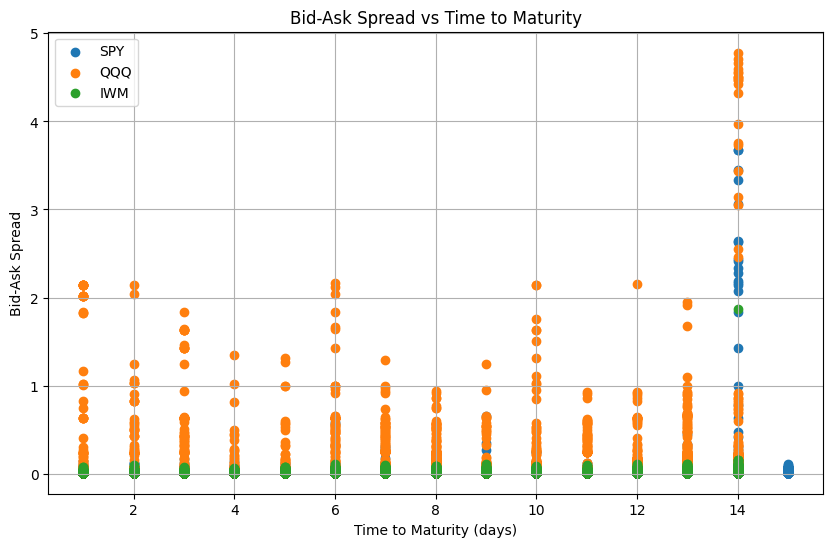

In [11]:
# Bid-Ask Spread vs Time To Maturity Scatter Plot
# calculate time to maturity
optimized_trades_df['Time to Maturity'] = (optimized_trades_df['Maturity'] - optimized_trades_df['Date']).dt.days

plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.scatter(subset['Time to Maturity'], subset['Spread'], label=symbol)

plt.legend()
plt.grid()
plt.title('Bid-Ask Spread vs Time to Maturity')
plt.xlabel('Time to Maturity (days)')
plt.ylabel('Bid-Ask Spread')
plt.show()

- Bid-ask spreads tend to increase as time to maturity increases, especially at 14 days where spreads are significantly wider.
- QQQ (orange) has the highest spreads across all maturities, suggesting lower liquidity or higher volatility compared to SPY and IWM.
- IWM (green) consistently has the tightest spreads, making it the most liquid option set.
- SPY (blue) remains stable but shows slight spread increases near 14 days, indicating that longer-dated options for SPY might have some liquidity constraints.
- Near-term options (1-5 days) have the smallest bid-ask spreads, reinforcing that shorter-term options are generally more liquid and cost-effective for trading.

## Option Payoff & Exposure

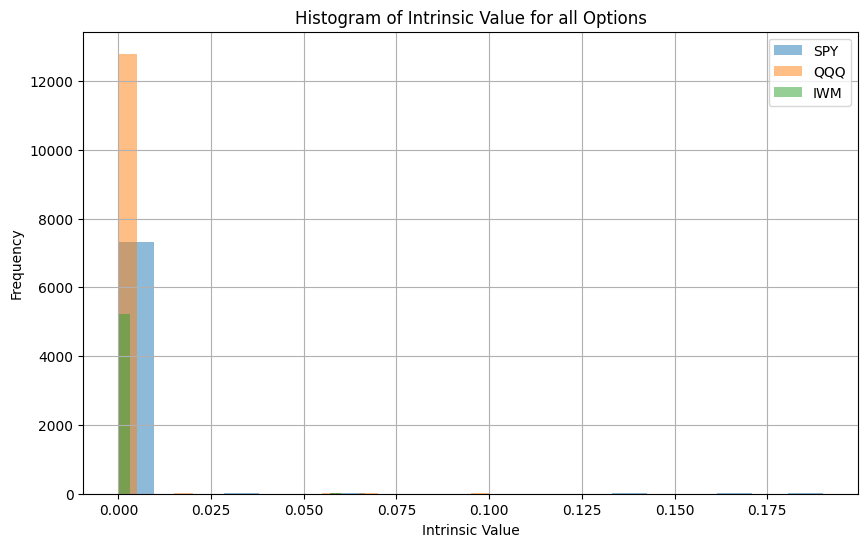

In [12]:
# histogram of max(Undl Price - Strike, 0) for all options
optimized_trades_df['Intrinsic Value'] = optimized_trades_df['Undl Price'] - optimized_trades_df['Strike']
optimized_trades_df['Intrinsic Value'] = optimized_trades_df['Intrinsic Value'].clip(lower=0)

plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.hist(subset['Intrinsic Value'], bins=20, alpha=0.5, label=symbol)

plt.legend()
plt.grid()
plt.title('Histogram of Intrinsic Value for all Options')
plt.xlabel('Intrinsic Value')
plt.ylabel('Frequency')
plt.show()

- Most options have an intrinsic value of zero, meaning they are out-of-the-money (OTM).
- Very few options have positive intrinsic value, indicating that in-the-money (ITM) options are rare in the dataset.
- QQQ (orange) has the highest frequency of OTM options, followed by SPY (blue) and IWM (green).
- Intrinsic values are concentrated near zero, suggesting that most options being traded are speculative bets rather than deep ITM contracts.
- Higher intrinsic values exist but are very sparse, reinforcing that traders might be more focused on leveraged plays (OTM options) rather than intrinsic value-driven positions.

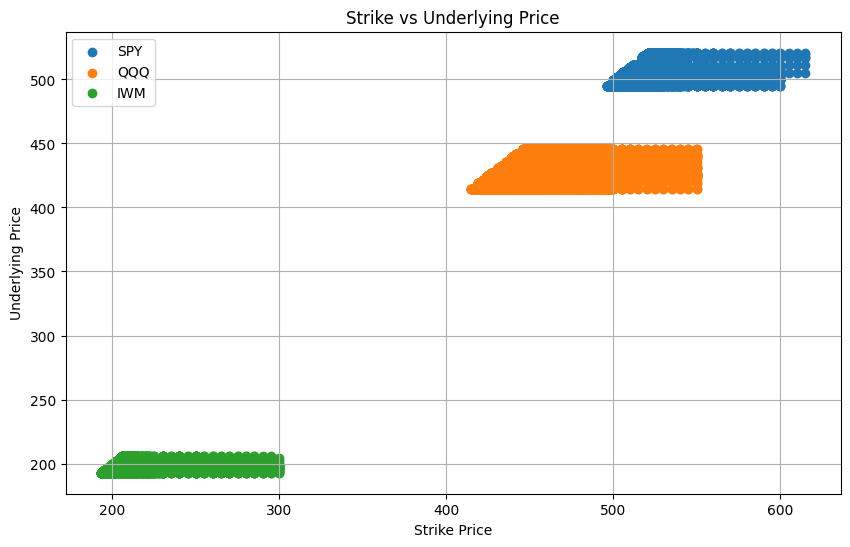

In [13]:
# expected exposure -> scatter plot of strike vs Undl Price
plt.figure(figsize=(10, 6))
for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.scatter(subset['Strike'], subset['Undl Price'], label=symbol)

plt.legend()
plt.grid()
plt.title('Strike vs Underlying Price')
plt.xlabel('Strike Price')
plt.ylabel('Underlying Price')
plt.show()

- Most options are near-the-money (strike price close to the underlying price) across SPY, QQQ, and IWM.
- Clear clustering per asset:
    - SPY (blue) has strikes around 500-550, aligning with its underlying price range.
    - QQQ (orange) has strikes around 400-450, matching its price levels.
    - IWM (green) has strikes between 190-220, closely tracking its price.
- Options tend to be structured in tight bands, meaning most strike prices are logically spaced around underlying prices rather than widely dispersed.
- Minimal deep in-the-money (ITM) or far out-of-the-money (OTM) strikes, which aligns with traders mostly focusing on near-the-money contracts.

## Correlation Analysis

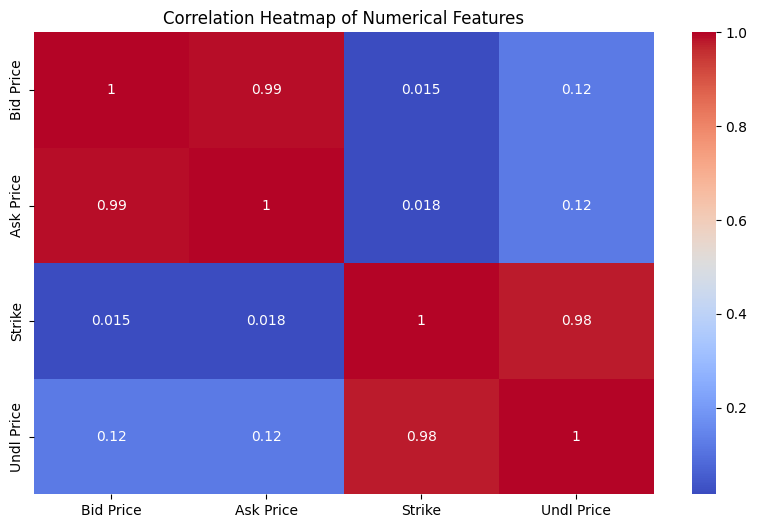

In [14]:
# Heatmap of numerical features Bid price, ask price, strike and underlying price
numerical_features = ['Bid Price', 'Ask Price', 'Strike', 'Undl Price']

plt.figure(figsize=(10, 6))
sns.heatmap(optimized_trades_df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Strong correlation (0.99) between Bid Price and Ask Price, indicating tight spreads in most cases.
- Very high correlation (0.98) between Strike Price and Underlying Price, suggesting most options are near-the-money.
- Weak correlation (~0.12) between Bid/Ask Prices and Underlying Price, meaning option prices do not move in a simple linear fashion with the stock price.
- Minimal correlation (~0.015) between Strike Price and Bid/Ask Prices, likely due to the variety of option maturities and volatilities affecting pricing.

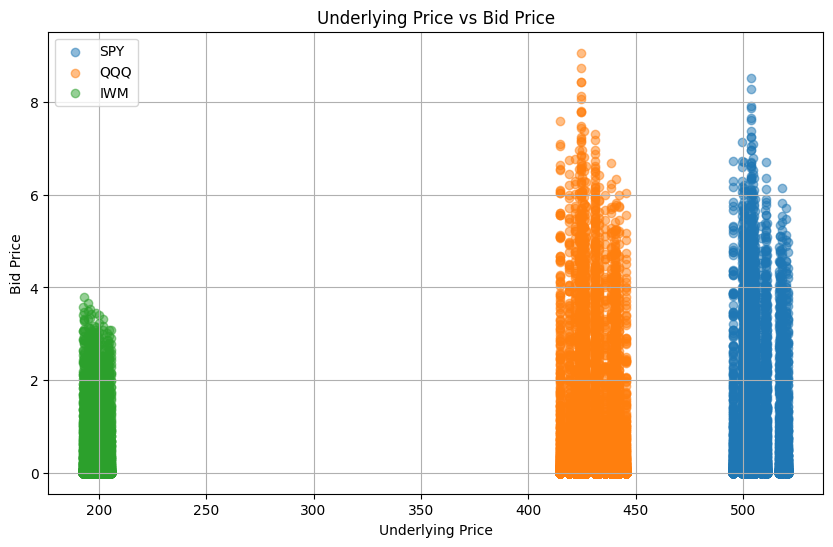

In [15]:
# Volatility impact on prices scatters plots of bid price and ask price vs underlying price
plt.figure(figsize=(10, 6))

for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.scatter(subset['Undl Price'], subset['Bid Price'], label=symbol, alpha=0.5)

plt.legend()
plt.grid()
plt.title('Underlying Price vs Bid Price')
plt.xlabel('Underlying Price')
plt.ylabel('Bid Price')
plt.show()

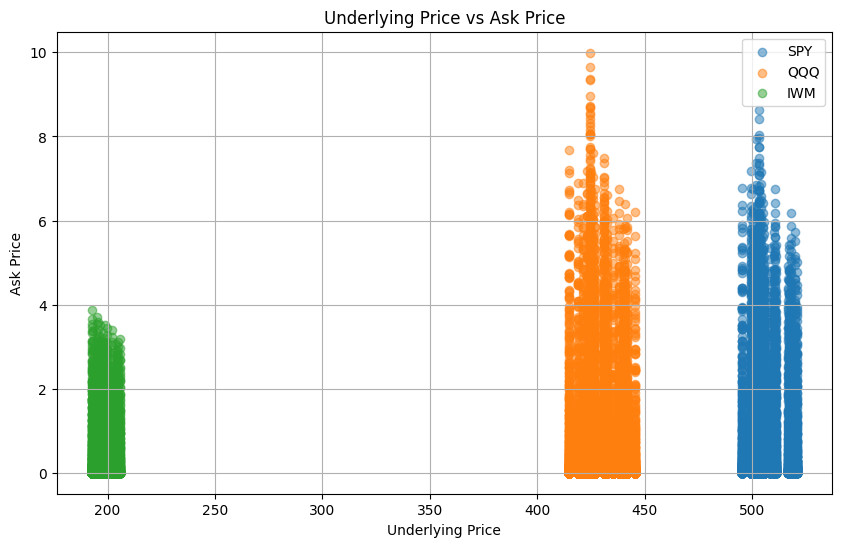

In [16]:
plt.figure(figsize=(10, 6))

for symbol in optimized_trades_df.Symbol.unique():
    subset = optimized_trades_df[optimized_trades_df.Symbol == symbol]
    plt.scatter(subset['Undl Price'], subset['Ask Price'], label=symbol, alpha=0.5)

plt.legend()
plt.grid()
plt.title('Underlying Price vs Ask Price')
plt.xlabel('Underlying Price')
plt.ylabel('Ask Price')
plt.show()    

- Bid and Ask Prices increase as the underlying price increases, showing a strong relationship between option pricing and stock price movement.
- SPY (blue) and QQQ (orange) have a broader range of bid/ask prices, indicating more variation in option demand and pricing.
- QQQ options have the highest bid/ask prices at the upper end, possibly due to higher implied volatility or liquidity constraints.
- IWM (green) options exhibit lower bid/ask prices with less variation, reinforcing that these options are generally less volatile and more liquid.
- Ask prices are consistently higher than bid prices, as expected, with spreads widening slightly at higher underlying price levels.

## So What's The Game Plan?
Based on our exploratory data analysis (EDA), we now have a clear understanding of the market behavior for SPY, QQQ, and IWM options. Our goal is to design an optimization and trading strategy that ensures a minimum exposure of +$10M while minimizing option premium costs.

1. Strategy Design:
    - Prioritize Short-Term Options
        - Bid-ask spreads are narrower for near-term options (1-5 days), meaning they are cheaper to enter and exit.
        - Holding longer-term options increases transaction costs.


    - Focus on SPY and IWM for Liquidity
        - SPY has lower bid-ask spreads and is more stable, making it a safe bet for hedging.
        - IWM has the lowest bid-ask spreads, reducing transaction costs.
        - QQQ has high spreads and volatile pricing, making it riskier. Use it selectively for high-exposure trades.

    - Balance ITM vs. OTM Option Selection
        - Most options in the dataset are OTM, meaning they have a low probability of expiring profitably.
        - Instead of buying deep ITM options (high cost) or far OTM options (low probability of payoff), we should focus on near-the-money (NTM) options for a cost-effective balance.

2. Optimization Approach:
    - Define Constraints:
        - Daily exposure must be at least $10M using intrinsic value calculations.
        - Minimize total premium cost over the full trading period.
        - Avoid negative exposure in any market scenario.

    - Mathematical Formulation:
        - Define decision variables as the number of contracts to buy per option.
        - Set up an objective function to minimize premium costs while satisfying the exposure constraint.
        - Use Linear Programming (LP) or Mixed-Integer Programming (MIP) to find the best combination of contracts.
        - Implement Monte Carlo Simulations to test strategy robustness across different price paths.

3. Execution Plan:
    - Step 1: Data Preprocessing
        - Clean and filter options based on liquidity (bid size, ask size) and reasonable spreads.
        - Compute expected exposure for different market moves.

    - Step 2: Model Training (Optimization Algorithm Development)
        - Implement LP/MIP to optimize contract selection for each day.
        - Test model on training data to ensure it meets the $10M exposure threshold at minimum cost.
        - Tune parameters and compare simple heuristic rules (e.g., fixed contract purchases) vs. optimization results.

    - Step 3: Final Testing & Model Validation
        - Apply model to test data on event day.
        - Adjust dynamically based on real-time results.
        - Present final results, showing:
            - Total cost over the month
            - Daily exposure validation
            - Comparison of optimized strategy vs. naive approaches

# Results Analysis

In [35]:
market_df = pd.read_csv("../data/BADSS test data.csv")
market_df.head()

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
0,7/31/2024,SPY,8/1/2024,551.0,2.67,2222,2.72,2199,550.81
1,7/31/2024,SPY,8/1/2024,552.0,2.14,1782,2.18,2337,550.81
2,7/31/2024,SPY,8/1/2024,553.0,1.67,1342,1.71,2476,550.81
3,7/31/2024,SPY,8/1/2024,554.0,1.26,1197,1.29,2928,550.81
4,7/31/2024,SPY,8/1/2024,555.0,0.92,1348,0.95,3695,550.81


In [18]:
market_df[(market_df['Strike'] == 531.0) & (market_df['Symbol'] == 'SPY')]

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price
13,4/11/2024,SPY,4/12/2024,531.0,0.00,0,0.01,11319,518.00
48,4/11/2024,SPY,4/15/2024,531.0,0.02,3382,0.03,17396,518.00
79,4/11/2024,SPY,4/16/2024,531.0,0.05,3413,0.06,13565,518.00
110,4/11/2024,SPY,4/17/2024,531.0,0.12,3444,0.13,9734,518.00
141,4/11/2024,SPY,4/18/2024,531.0,0.22,2485,0.23,2877,518.00
...,...,...,...,...,...,...,...,...,...
7210,5/10/2024,SPY,5/17/2024,531.0,0.28,2073,0.29,1236,520.84
7253,5/10/2024,SPY,5/20/2024,531.0,0.39,1953,0.41,1941,520.84
7275,5/10/2024,SPY,5/21/2024,531.0,0.50,1638,0.52,1823,520.84
7297,5/10/2024,SPY,5/22/2024,531.0,0.75,1322,0.77,1705,520.84


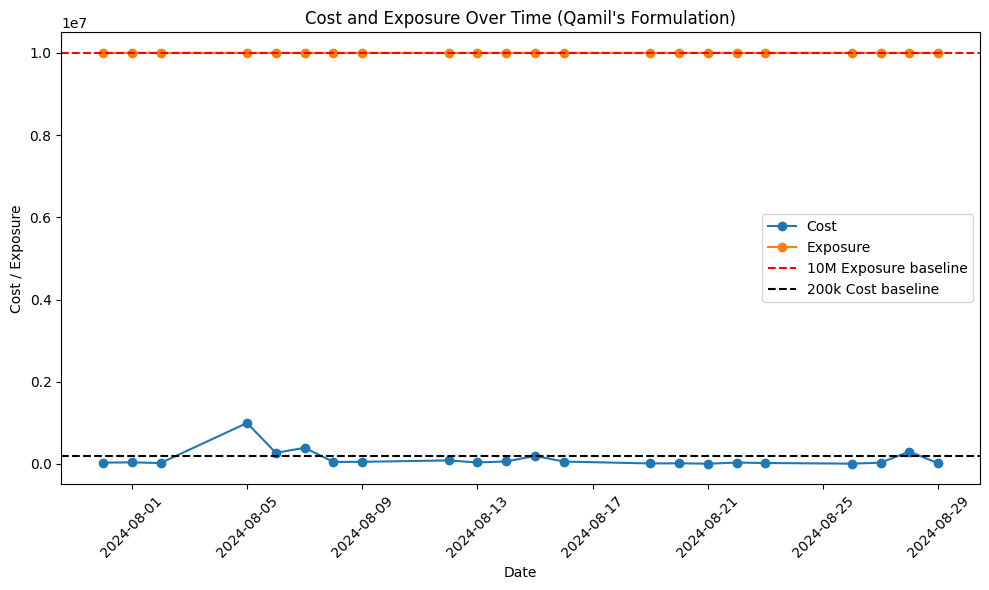

In [37]:
optimized_trades_df = pd.read_csv("../results/MAIN_MODEL_TEST_optimized_trades.csv")
optimized_trades_df.columns = optimized_trades_df.columns.str.strip()
optimized_trades_df['Date'] = pd.to_datetime(optimized_trades_df['Date'])
optimized_trades_df.sort_values("Date", inplace=True)

# Aggregate daily premium cost (sum) and exposure (mean, since it's identical per day)
daily = optimized_trades_df.groupby("Date").agg(
    Premium_Cost=("Premium_Cost", "sum"),
    Exposure=("Exposure", "mean")
).reset_index()

# Plot cost and exposure over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily["Date"], daily["Premium_Cost"], marker='o', label="Cost")
ax.plot(daily["Date"], daily["Exposure"], marker='o', label="Exposure")
ax.axhline(y=1e7, color='r', linestyle='--', label="10M Exposure baseline")
ax.axhline(y=2e5, color='black', linestyle='--', label="200k Cost baseline")
ax.set_title("Cost and Exposure Over Time (Qamil's Formulation)")
ax.set_xlabel("Date")
ax.set_ylabel("Cost / Exposure")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
daily

,Date,Premium_Cost,Exposure
0,2024-07-31,32732.0,1.000023e+07
1,2024-08-01,40062.0,1.000009e+07
2,2024-08-02,23242.0,1.000016e+07
3,2024-08-05,998201.0,1.000001e+07
4,2024-08-06,270614.0,1.000000e+07
5,2024-08-07,393409.0,1.000002e+07
6,2024-08-08,50336.0,1.000013e+07
7,2024-08-09,52510.0,1.000008e+07
8,2024-08-12,87108.0,1.000008e+07
9,2024-08-13,37470.0,1.000006e+07


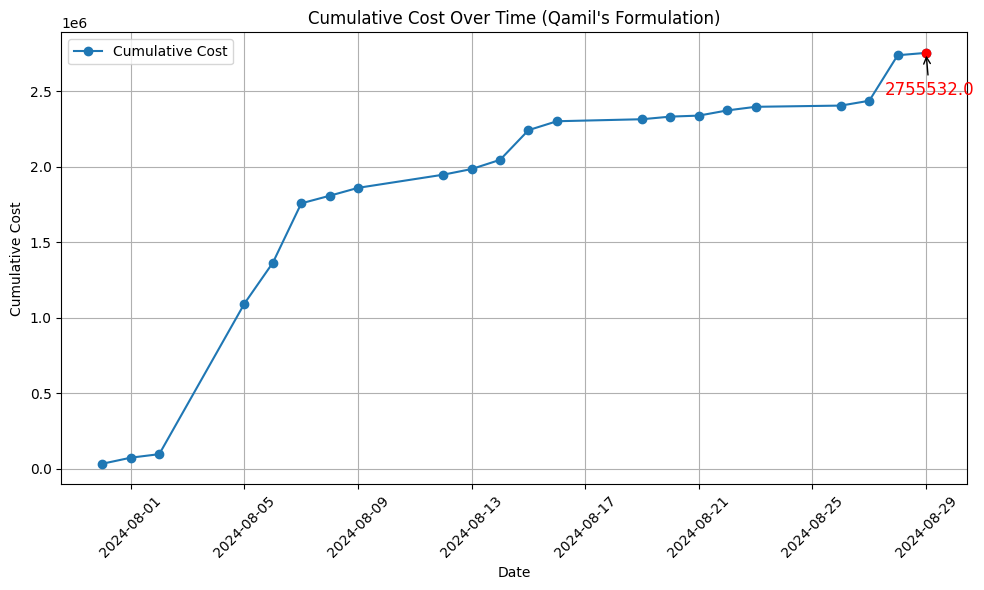

In [39]:
# Compute cumulative sum
cumsum = daily["Premium_Cost"].cumsum()

# Get total cost at the end of trade horizon
total_cost = np.round(cumsum.iloc[-1], 2)

plt.figure(figsize=(10, 6))
plt.plot(daily["Date"], cumsum, marker='o', label="Cumulative Cost")

# Highlight the last point
plt.scatter(daily["Date"].iloc[-1], cumsum.iloc[-1], color='red', zorder=3)
plt.annotate(f"{total_cost}",
             xy=(daily["Date"].iloc[-1], cumsum.iloc[-1]),
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=12, color='red')

# Chart formatting
plt.title("Cumulative Cost Over Time (Qamil's Formulation)")
plt.xlabel("Date")
plt.ylabel("Cumulative Cost")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


In [22]:
print(f"Market Data Dimensions: {market_df.shape}")
print(f"Optimized Trades Dimensions: {optimized_trades_df.shape}")

Market Data Dimensions: (25438, 9)
Optimized Trades Dimensions: (86, 10)


## Calculating PNL

In [40]:
# create Option_ID for market data to track pnl adjustments
market_df['Option_ID'] = market_df["Symbol"] + "_" + market_df["Maturity"] + "_" + market_df["Strike"].astype(str)

market_df

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID
0,7/31/2024,SPY,8/1/2024,551.0,2.67,2222,2.72,2199,550.81,SPY_8/1/2024_551.0
1,7/31/2024,SPY,8/1/2024,552.0,2.14,1782,2.18,2337,550.81,SPY_8/1/2024_552.0
2,7/31/2024,SPY,8/1/2024,553.0,1.67,1342,1.71,2476,550.81,SPY_8/1/2024_553.0
3,7/31/2024,SPY,8/1/2024,554.0,1.26,1197,1.29,2928,550.81,SPY_8/1/2024_554.0
4,7/31/2024,SPY,8/1/2024,555.0,0.92,1348,0.95,3695,550.81,SPY_8/1/2024_555.0
...,...,...,...,...,...,...,...,...,...,...
25638,8/30/2024,QQQ,9/13/2024,550.0,0.00,0,0.02,7920,476.27,QQQ_9/13/2024_550.0
25639,8/30/2024,QQQ,9/13/2024,555.0,0.00,0,0.02,8946,476.27,QQQ_9/13/2024_555.0
25640,8/30/2024,QQQ,9/13/2024,560.0,0.00,0,0.02,9851,476.27,QQQ_9/13/2024_560.0
25641,8/30/2024,QQQ,9/13/2024,565.0,0.00,0,0.02,10932,476.27,QQQ_9/13/2024_565.0


In [41]:
market_df[market_df["Option_ID"] == "SPY_4/12/2024_531.0"]

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID


In [42]:
optimized_trades_df

,Date,Option_ID,Symbol,Maturity,Buy,Ask_Price,Bid_Price,Premium_Cost,Exposure
0,2024-07-31,SPY_8/1/2024_564.0,SPY,8/1/2024,7020.0,0.02,0.01,14040.0,1.000023e+07
1,2024-07-31,SPY_8/1/2024_567.0,SPY,8/1/2024,18692.0,0.01,0.00,18692.0,1.000023e+07
2,2024-08-01,SPY_8/2/2024_563.0,SPY,8/2/2024,5221.0,0.02,0.01,10442.0,1.000009e+07
3,2024-08-01,SPY_8/2/2024_565.0,SPY,8/2/2024,29620.0,0.01,0.00,29620.0,1.000009e+07
4,2024-08-02,SPY_8/5/2024_553.0,SPY,8/5/2024,23242.0,0.01,0.00,23242.0,1.000016e+07
5,2024-08-05,SPY_8/6/2024_530.0,SPY,8/6/2024,1.0,0.62,0.60,62.0,1.000001e+07
6,2024-08-05,SPY_8/6/2024_531.0,SPY,8/6/2024,21237.0,0.47,0.45,998139.0,1.000001e+07
7,2024-08-06,SPY_8/7/2024_536.0,SPY,8/7/2024,20437.0,0.08,0.07,163496.0,1.000000e+07
8,2024-08-06,SPY_8/7/2024_537.0,SPY,8/7/2024,17853.0,0.06,0.05,107118.0,1.000000e+07
9,2024-08-07,QQQ_8/8/2024_449.0,QQQ,8/8/2024,6103.0,0.23,0.22,140369.0,1.000002e+07


In [44]:
# Ensure 'Date' column in both DataFrames is in datetime format
market_df["Date"] = pd.to_datetime(market_df["Date"])
optimized_trades_df["Date"] = pd.to_datetime(optimized_trades_df["Date"])

# Prep for merge
temp_df = optimized_trades_df[["Date", "Option_ID", "Buy", "Premium_Cost"]]

# Merge on Option_ID and Date
merged_df = market_df.merge(temp_df, on=["Option_ID", "Date"], how="left", suffixes=("", "_y"))

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

merged_df


,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID,Buy,Premium_Cost
0,2024-07-31,SPY,8/1/2024,551.0,2.67,2222,2.72,2199,550.81,SPY_8/1/2024_551.0,0.0,0.0
1,2024-07-31,SPY,8/1/2024,552.0,2.14,1782,2.18,2337,550.81,SPY_8/1/2024_552.0,0.0,0.0
2,2024-07-31,SPY,8/1/2024,553.0,1.67,1342,1.71,2476,550.81,SPY_8/1/2024_553.0,0.0,0.0
3,2024-07-31,SPY,8/1/2024,554.0,1.26,1197,1.29,2928,550.81,SPY_8/1/2024_554.0,0.0,0.0
4,2024-07-31,SPY,8/1/2024,555.0,0.92,1348,0.95,3695,550.81,SPY_8/1/2024_555.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25638,2024-08-30,QQQ,9/13/2024,550.0,0.00,0,0.02,7920,476.27,QQQ_9/13/2024_550.0,0.0,0.0
25639,2024-08-30,QQQ,9/13/2024,555.0,0.00,0,0.02,8946,476.27,QQQ_9/13/2024_555.0,0.0,0.0
25640,2024-08-30,QQQ,9/13/2024,560.0,0.00,0,0.02,9851,476.27,QQQ_9/13/2024_560.0,0.0,0.0
25641,2024-08-30,QQQ,9/13/2024,565.0,0.00,0,0.02,10932,476.27,QQQ_9/13/2024_565.0,0.0,0.0


In [45]:
optimized_trades_df[optimized_trades_df["Option_ID"] == "SPY_4/25/2024_517.0"]

,Date,Option_ID,Symbol,Maturity,Buy,Ask_Price,Bid_Price,Premium_Cost,Exposure


In [46]:
merged_df[merged_df["Option_ID"] == "SPY_4/25/2024_517.0"]

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID,Buy,Premium_Cost


In [47]:
# Calculate PnL for each trade -> If buiying -> Pnl = num_options * contract_size * (bid_price_day1 - ask_price_day0) 

# only keep rows where its option id was involved in a trade
merged_df = merged_df[merged_df["Option_ID"].isin(optimized_trades_df["Option_ID"])]

In [48]:
# TODO: When merged, there are multiple rows with false data! i.e below, only the 3554th row is correct, and the rest are false
merged_df[merged_df["Option_ID"] == "SPY_4/25/2024_517.0"]

,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID,Buy,Premium_Cost


In [49]:
def calculate_pnl(df):
    """
    Calculate PnL for all Option_IDs in the dataset.
    
    Parameters:
        df (pd.DataFrame): The merged DataFrame containing trade data with next-day bid prices.

    Returns:
        pd.DataFrame: DataFrame with an additional 'PnL' column.
    """
    # Ensure Date column is in datetime format
    df["Date"] = pd.to_datetime(df["Date"])

    # Initialize an empty list to store PnL values
    pnl_list = []

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        # Check if this is a buy transaction
        if row["Buy"] > 0:
            # Calculate next day date
            next_day = row["Date"] + pd.DateOffset(1)

            # Find the next day's bid price for the same Option_ID
            next_day_row = df[(df["Date"] == next_day) & (df["Option_ID"] == row["Option_ID"])]

            if not next_day_row.empty:
                # Extract bid price for next day
                bid_price_day1 = next_day_row["Bid Price"].values[0]
                ask_price_day0 = row["Ask Price"]  # Purchase price

                # Calculate PnL
                pnl = row["Buy"] * 100 * (bid_price_day1 - ask_price_day0)
            else:
                # If next day's price is missing, assume full loss (Premium Cost)
                pnl = -row["Premium_Cost"]
        else:
            # If not a buy transaction, set PnL to 0
            pnl = 0

        # Append the result to the list
        pnl_list.append(pnl)

    # Add the PnL column to the DataFrame
    df["PnL"] = pnl_list

    return df

# Apply the function to the DataFrame
df_with_pnl = calculate_pnl(merged_df)

df_with_pnl

/tmp/ipykernel_17626/4229604107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
/tmp/ipykernel_17626/4229604107.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PnL"] = pnl_list


,Date,Symbol,Maturity,Strike,Bid Price,Bid Size,Ask Price,Ask Size,Undl Price,Option_ID,Buy,Premium_Cost,PnL
13,2024-07-31,SPY,8/1/2024,564.0,0.01,7207,0.02,21514,550.81,SPY_8/1/2024_564.0,7020.0,14040.0,-14040.0
16,2024-07-31,SPY,8/1/2024,567.0,0.00,0,0.01,18692,550.81,SPY_8/1/2024_567.0,18692.0,18692.0,-18692.0
57,2024-07-31,SPY,8/2/2024,563.0,0.19,6964,0.20,12357,550.81,SPY_8/2/2024_563.0,0.0,0.0,0.0
59,2024-07-31,SPY,8/2/2024,565.0,0.08,11496,0.09,13738,550.81,SPY_8/2/2024_565.0,0.0,0.0,0.0
92,2024-07-31,SPY,8/5/2024,553.0,3.37,1375,3.43,1207,550.81,SPY_8/5/2024_553.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24428,2024-08-27,QQQ,8/30/2024,493.0,0.30,2625,0.31,3779,476.76,QQQ_8/30/2024_493.0,0.0,0.0,0.0
24716,2024-08-28,QQQ,8/30/2024,487.0,0.47,5138,0.53,4455,471.35,QQQ_8/30/2024_487.0,0.0,0.0,0.0
24723,2024-08-28,QQQ,8/30/2024,493.0,0.16,4206,0.20,11623,471.35,QQQ_8/30/2024_493.0,0.0,0.0,0.0
25033,2024-08-29,QQQ,8/30/2024,487.0,0.01,7046,0.02,7988,470.66,QQQ_8/30/2024_487.0,4020.0,8040.0,-8040.0


In [32]:
optimized_trades_df[optimized_trades_df["Date"] == "2024-04-11"]

,Date,Option_ID,Symbol,Maturity,Buy,Sell,Ask_Price,Bid_Price,Premium_Cost,Exposure
0,2024-04-11,SPY_4/12/2024_531.0,SPY,4/12/2024,11316.0,0.0,0.01,0.00,11316.0,1.000001e+07
1,2024-04-11,SPY_4/12/2024_532.0,SPY,4/12/2024,4.0,0.0,0.01,0.00,4.0,1.000001e+07
53,2024-04-11,QQQ_4/12/2024_459.0,QQQ,4/12/2024,4703.0,0.0,0.02,0.01,9406.0,1.000001e+07


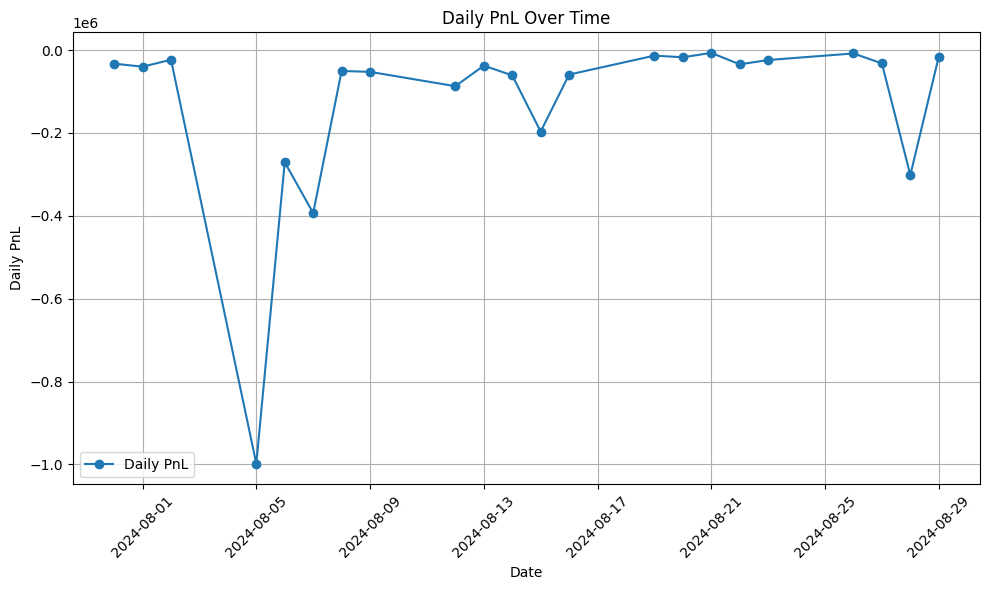

In [50]:
# plot daily pnl and emphasize the end of trade horizon
daily_pnl = df_with_pnl.groupby("Date")["PnL"].sum().reset_index()

# plot daily pnl and emphasize the end of trade horizon
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_pnl["Date"], daily_pnl["PnL"], marker='o', label="Daily PnL")
ax.set_title("Daily PnL Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Daily PnL")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

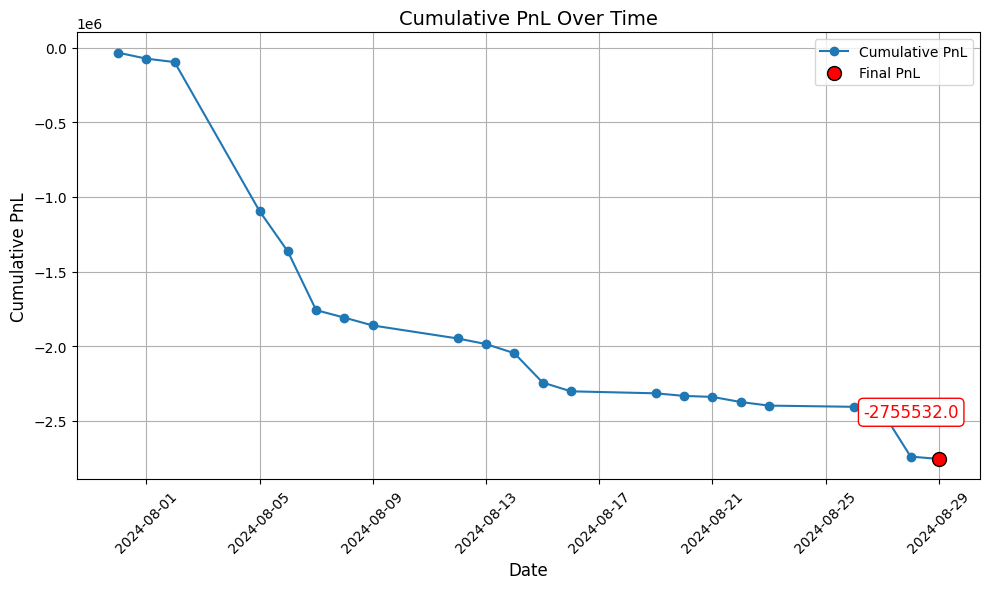

In [51]:
# Compute cumulative PnL
daily_pnl["Cumulative_PnL"] = daily_pnl["PnL"].cumsum()

# Get the final PnL value
total_pnl = np.round(daily_pnl["Cumulative_PnL"].iloc[-1], 2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_pnl["Date"], daily_pnl["Cumulative_PnL"], marker='o', label="Cumulative PnL")

# Highlight the final point
plt.scatter(daily_pnl["Date"].iloc[-1], total_pnl, color='red', s=100, label="Final PnL", edgecolors='black', zorder=3)

# Add annotation for the final PnL value
plt.annotate(f"{total_pnl}",
             (daily_pnl["Date"].iloc[-1], total_pnl),
             textcoords="offset points",
             xytext=(-20, 30),
             ha='center',
             fontsize=12,
             color='red',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white"))

# Set labels and title
plt.title("Cumulative PnL Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative PnL", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
